In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn import metrics
#pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('D:/IIM/Misc/Credit Card default/application_record.csv')
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Default
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26783,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2,1
26784,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2,0
26785,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2,0
26786,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2,0


In [3]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]
print(X.shape)
print(y.shape)

(26788, 17)
(26788,)


In [4]:
# Checking class balance
df['Default'].value_counts()

0    26425
1      363
Name: Default, dtype: int64

In [5]:
# Checking for Null Values
df.isna().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE        False
CNT_FAM_MEMBERS        False
Default                False
dtype: bool

In [6]:
# Under and over sampling the data
from collections import Counter
#pip install imblearn (You may have to install tensorflow and keras for it to work)
from imblearn.over_sampling import RandomOverSampler  
from imblearn.under_sampling import RandomUnderSampler
over = RandomOverSampler(sampling_strategy=0.4)
X,y = over.fit_resample(X,y)
print(Counter(y))
under = RandomUnderSampler(sampling_strategy=0.5)
X,y = under.fit_resample(X,y)
print(Counter(y))

Counter({0: 26425, 1: 10570})
Counter({0: 21140, 1: 10570})


In [7]:
# Feature Encoding
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X.iloc[:,0:3] = enc.fit_transform(X.iloc[:,0:3])
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first',sparse = False)
X_enc = enc.fit_transform(X.iloc[:,[5,6,7,8,15]])
X_enc.shape

(31710, 35)

In [8]:
enc.categories_

[array(['Commercial associate', 'Pensioner', 'State servant', 'Student',
        'Working'], dtype=object),
 array(['Academic degree', 'Higher education', 'Incomplete higher',
        'Lower secondary', 'Secondary / secondary special'], dtype=object),
 array(['Civil marriage', 'Married', 'Separated', 'Single / not married',
        'Widow'], dtype=object),
 array(['Co-op apartment', 'House / apartment', 'Municipal apartment',
        'Office apartment', 'Rented apartment', 'With parents'],
       dtype=object),
 array(['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
        'Drivers', 'HR staff', 'High skill tech staff', 'IT staff',
        'Laborers', 'Low-skill Laborers', 'Managers', 'Medicine staff',
        'None', 'Private service staff', 'Realty agents', 'Sales staff',
        'Secretaries', 'Security staff', 'Waiters/barmen staff'],
       dtype=object)]

In [9]:
col = [ 'Pensioner', 'State servant', 'Student','Working', 'Higher education', 'Incomplete higher',
        'Lower secondary', 'Secondary / secondary special', 'Married', 'Separated', 'Single / not married',
        'Widow', 'House / apartment', 'Municipal apartment','Office apartment', 'Rented apartment', 'With parents',
        'Cleaning staff', 'Cooking staff', 'Core staff','Drivers', 'HR staff', 'High skill tech staff', 'IT staff',
        'Laborers', 'Low-skill Laborers', 'Managers', 'Medicine staff',
        'None', 'Private service staff', 'Realty agents', 'Sales staff',
        'Secretaries', 'Security staff', 'Waiters/barmen staff']
df2 = pd.DataFrame(X_enc,columns = col)
df2

,Pensioner,State servant,Student,Working,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Married,Separated,...,Low-skill Laborers,Managers,Medicine staff,None,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31705,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
31706,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
31707,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31708,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df3 = pd.concat([X,df2],axis = 1)
df3.drop(['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'], axis=1, inplace = True)
df3

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,...,Low-skill Laborers,Managers,Medicine staff,None,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,0.0,0.0,1.0,0,180000.0,-16091,-7371,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0,180000.0,-23007,-11589,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0,225000.0,-22846,-9239,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0,225000.0,-10304,-1682,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0,90000.0,-10731,-885,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31705,0.0,1.0,0.0,0,117000.0,-21585,365243,1,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
31706,0.0,0.0,1.0,0,157500.0,-21751,365243,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
31707,1.0,0.0,1.0,0,112500.0,-20103,-555,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31708,1.0,1.0,1.0,1,180000.0,-14450,-3243,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Splitting the dataset into the Training set and Test set  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3, y, test_size = 0.3, random_state = 22,shuffle = True)
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (22197, 47)
y_train Shape: (22197,)
X_test Shape: (9513, 47)
y_test Shape: (9513,)


In [12]:
# Running the algo by selecting current and all previous features
xgb = XGBClassifier(random_state = 4)
j = 0
for i in X_train.columns:
    model = xgb.fit(X_train.iloc[:,:j+1],y_train)
    y_pred = xgb.predict(X_test.iloc[:,:j+1])
    print('Taking ' + i+ ' and previous feature(s): Accuracy =  {:.4f}'.format(accuracy_score(y_test,y_pred)))
    j = j+1


Taking CODE_GENDER and previous feature(s): Accuracy =  0.6659
Taking FLAG_OWN_CAR and previous feature(s): Accuracy =  0.6659
Taking FLAG_OWN_REALTY and previous feature(s): Accuracy =  0.6659
Taking CNT_CHILDREN and previous feature(s): Accuracy =  0.6687
Taking AMT_INCOME_TOTAL and previous feature(s): Accuracy =  0.7618
Taking DAYS_BIRTH and previous feature(s): Accuracy =  0.9443
Taking DAYS_EMPLOYED and previous feature(s): Accuracy =  0.9681
Taking FLAG_MOBIL and previous feature(s): Accuracy =  0.9681
Taking FLAG_WORK_PHONE and previous feature(s): Accuracy =  0.9672
Taking FLAG_PHONE and previous feature(s): Accuracy =  0.9706
Taking FLAG_EMAIL and previous feature(s): Accuracy =  0.9707
Taking CNT_FAM_MEMBERS and previous feature(s): Accuracy =  0.9717
Taking Pensioner and previous feature(s): Accuracy =  0.9686
Taking State servant and previous feature(s): Accuracy =  0.9742
Taking Student and previous feature(s): Accuracy =  0.9742
Taking Working and previous feature(s): Ac

In [13]:
# Running the algo by selecting current feature only
xgb = XGBClassifier(random_state = 4)
j = 0
for i in X_train.columns:
    model = xgb.fit(np.array(X_train.iloc[:,j]).reshape((-1,1)),y_train)
    y_pred = xgb.predict(np.array(X_test.iloc[:,j]).reshape((-1,1)))
    print('Taking ' + i+ ' feature Only: Accuracy =  {:.4f}'.format(accuracy_score(y_test,y_pred)))
    j = j+1

Taking CODE_GENDER feature Only: Accuracy =  0.6659
Taking FLAG_OWN_CAR feature Only: Accuracy =  0.6659
Taking FLAG_OWN_REALTY feature Only: Accuracy =  0.6659
Taking CNT_CHILDREN feature Only: Accuracy =  0.6659
Taking AMT_INCOME_TOTAL feature Only: Accuracy =  0.6884
Taking DAYS_BIRTH feature Only: Accuracy =  0.9102
Taking DAYS_EMPLOYED feature Only: Accuracy =  0.8642
Taking FLAG_MOBIL feature Only: Accuracy =  0.6659
Taking FLAG_WORK_PHONE feature Only: Accuracy =  0.6659
Taking FLAG_PHONE feature Only: Accuracy =  0.6659
Taking FLAG_EMAIL feature Only: Accuracy =  0.6659
Taking CNT_FAM_MEMBERS feature Only: Accuracy =  0.6659
Taking Pensioner feature Only: Accuracy =  0.6659
Taking State servant feature Only: Accuracy =  0.6659
Taking Student feature Only: Accuracy =  0.6659
Taking Working feature Only: Accuracy =  0.6659
Taking Higher education feature Only: Accuracy =  0.6659
Taking Incomplete higher feature Only: Accuracy =  0.6659
Taking Lower secondary feature Only: Accurac

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      6335
           1       0.93      0.99      0.96      3178

    accuracy                           0.97      9513
   macro avg       0.96      0.98      0.97      9513
weighted avg       0.97      0.97      0.97      9513



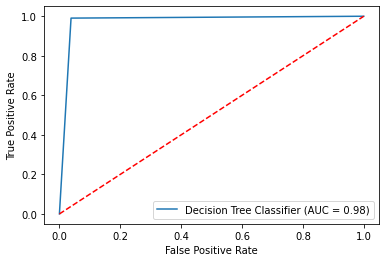

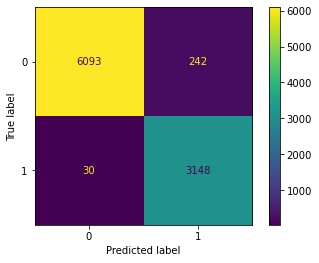

In [14]:
# Algo with full set of features
xgb = XGBClassifier(random_state = 4,importance_type= 'weight')
model = xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree Classifier')
display.plot()  # doctest: +SKIP
plt.plot([0, 1], [0, 1],'r--')
plt.show() 
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

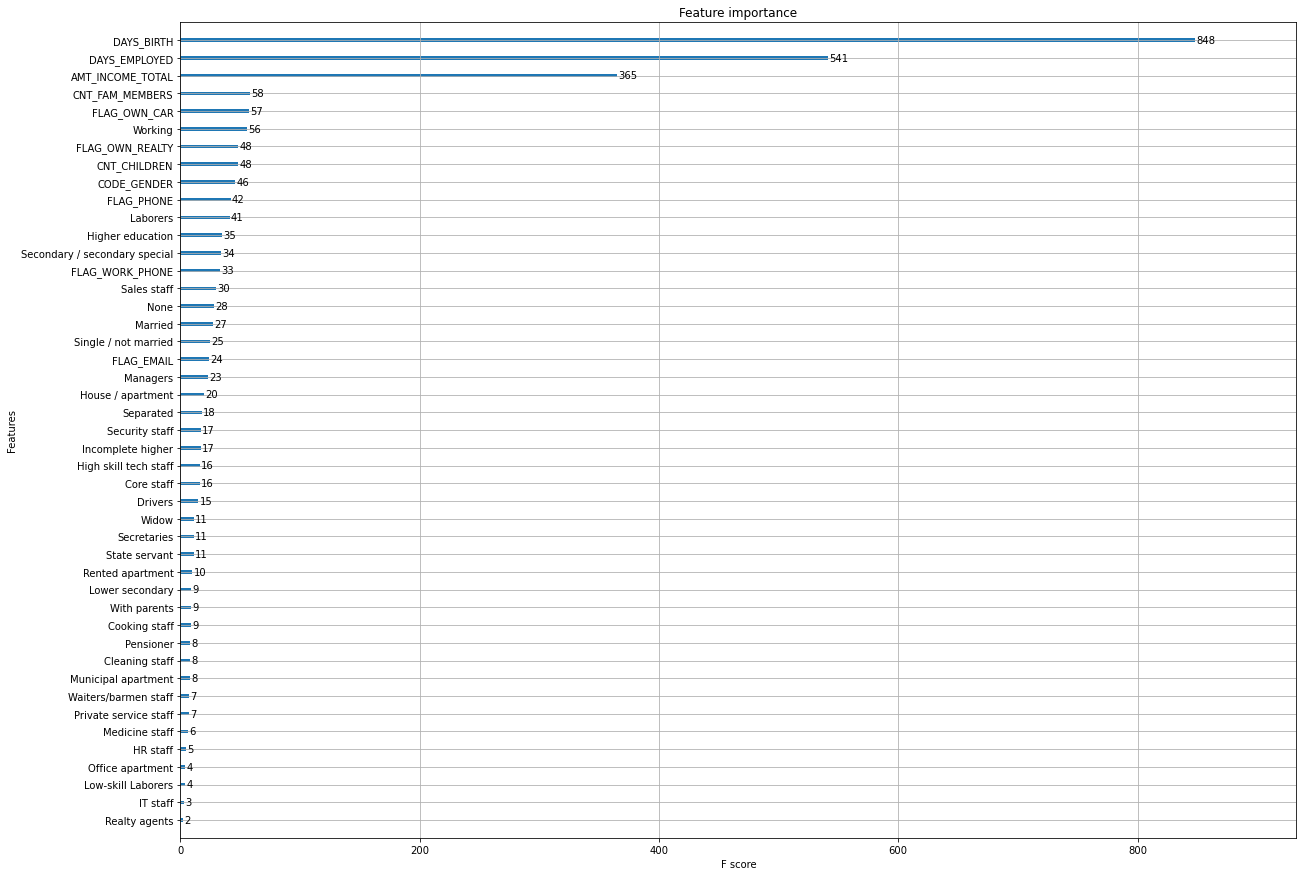

In [15]:
# Plotting feature importance
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(20, 15))
plot_importance(model,ax = ax)

In [16]:
results=pd.DataFrame( index = X_train.columns )
results['importances'] = model.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)
results

,importances
DAYS_BIRTH,0.318797
DAYS_EMPLOYED,0.203383
AMT_INCOME_TOTAL,0.137218
CNT_FAM_MEMBERS,0.021805
FLAG_OWN_CAR,0.021429
Working,0.021053
FLAG_OWN_REALTY,0.018045
CNT_CHILDREN,0.018045
CODE_GENDER,0.017293
FLAG_PHONE,0.015789


In [22]:
# get top n Features
n = 4
col =  results.iloc[:n].T.columns.tolist()
print('Top %d features considered'%(n))
print('Features Considered :',col)
xgb = XGBClassifier(random_state = 4,importance_type= 'weight')
model = xgb.fit(X_train[col],y_train)
y_pred = xgb.predict(X_test[col])
print(classification_report(y_test, y_pred))

Top 4 features considered
Features Considered : ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS']
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      6335
           1       0.93      0.99      0.95      3178

    accuracy                           0.97      9513
   macro avg       0.96      0.97      0.97      9513
weighted avg       0.97      0.97      0.97      9513

